In [1]:
import numpy as np
import pandas as pd

filename = 'data/counts.txt'
with open(filename, 'rt') as f:
    data_table = pd.read_csv(f, index_col=0)

samples = list(data_table.columns)
    
data_table

,00624286-41dd-476f-a63b-d2a5f484bb45,TCGA-FS-A1Z0,TCGA-D9-A3Z1,02c76d24-f1d2-4029-95b4-8be3bda8fdbe,TCGA-EB-A51B,TCGA-D3-A1Q3,TCGA-FR-A44A,TCGA-EE-A17Z,TCGA-D3-A51G,TCGA-D3-A51E,...,TCGA-D9-A149,TCGA-EE-A3AG,TCGA-D9-A4Z2,TCGA-EB-A4OZ,TCGA-EE-A3J4,TCGA-FS-A1ZM,TCGA-D3-A5GS,TCGA-EB-A3XF,TCGA-EE-A2GE,ff7431a9-243a-4651-80bb-096379925bbe
A1BG,1272.36,452.96,288.06,400.11,420.46,877.59,402.77,559.20,269.59,586.66,...,631.78,560.60,846.55,678.00,32.88,997.41,256.93,461.60,634.06,530.36
A1CF,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,4.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
A2BP1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00
A2LD1,164.38,552.43,201.83,165.12,95.75,636.63,241.56,30.82,105.44,239.19,...,218.47,274.45,770.04,71.74,17.00,194.26,156.81,84.35,242.01,377.03
A2ML1,27.00,0.00,0.00,0.00,8.00,0.00,1.00,763.00,0.00,0.00,...,3.00,6.00,0.00,1043.00,1.00,852.00,4.00,587.00,0.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,7743.00,12524.00,5463.00,10349.00,4667.00,26170.00,14366.00,5787.00,25375.00,9099.00,...,17374.00,52136.00,7938.00,8097.00,14836.00,15208.00,11516.00,8661.00,23022.00,11788.00
ZZEF1,2761.00,4428.00,2119.00,3430.00,4302.00,8853.00,3691.00,4892.00,2877.00,1935.00,...,9747.00,13625.00,6702.00,1633.00,3814.00,5614.00,2721.00,2905.00,4385.00,3139.00
ZZZ3,710.00,2889.00,3197.00,1284.00,2925.00,6011.00,2666.00,1935.00,5998.00,2137.00,...,3975.00,4361.00,2862.00,337.00,3815.00,2016.00,1163.00,3284.00,1764.00,2208.00
psiTPTE22,3.00,11.00,26.00,57.00,1.00,25.00,46.00,8.00,4.00,7.00,...,16.00,25.00,24.00,192.00,8.00,117.00,7.00,15.00,106.00,41.00


In [2]:
print(len(data_table))
print(len(samples))

20500
375


In [3]:
filename = 'data/genes.csv'
with open(filename, 'rt') as f:
    gene_info = pd.read_csv(f, index_col=0)
gene_info.iloc[:5, :]

,GeneID,GeneLength
GeneSymbol,,
CPA1,1357,1724
GUCY2D,3000,3623
UBC,7316,2687
C11orf95,65998,5581
ANKMY2,57037,2611


In [4]:
print(data_table.shape)
print(gene_info.shape)

(20500, 375)
(20503, 2)


In [5]:
matched_index = pd.Index.intersection(data_table.index, gene_info.index)

In [6]:
counts = np.asarray(data_table.loc[matched_index], dtype=int)
gene_names = np.array(matched_index)

print(counts.shape)
print(gene_names.shape)

(20500, 375)
(20500,)


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('style/elegant.mplstyle')

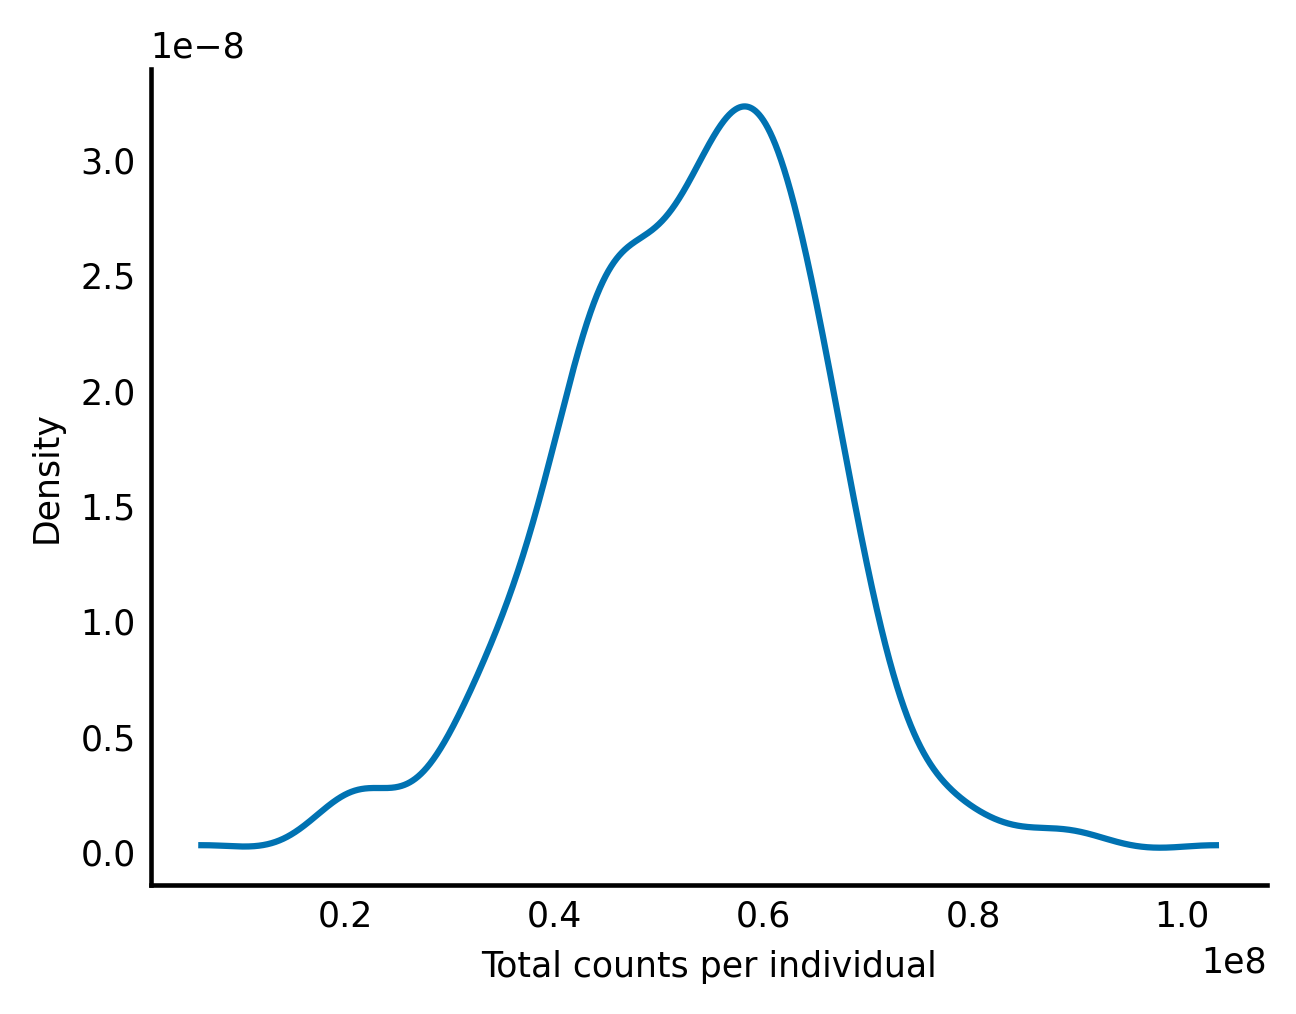

In [8]:
total_counts = np.sum(counts, axis=0)

from scipy import stats

density = stats.kde.gaussian_kde(total_counts)

x = np.arange(min(total_counts), max(total_counts), 10000)

fig, ax = plt.subplots()
ax.plot(x, density(x))
ax.set_xlabel("Total counts per individual")
ax.set_ylabel("Density")

plt.show()

In [9]:
print(f'Count statistics:\n min: {np.min(total_counts)}'
     f'\n mean: {np.mean(total_counts)}'
     f'\n max: {np.max(total_counts)}')

Count statistics:
 min: 6231205
 mean: 52995255.33866667
 max: 103219262


In [11]:
np.random.seed(seed=7)

samples_index = np.random.choice(range(counts.shape[1]), size=70, replace=False)
counts_subset = counts[:, samples_index]

In [27]:
# Some custom x-axis labelling to make our plots easier to read
def reduce_xaxis_labels(ax, factor):
    """Show only every ith label to prevent crowding on x-axis
        e.g. factor = 2 would plot every second x-axis label,
        starting at the first.

    Parameters
    ----------
    ax : matplotlib plot axis to be adjusted
    factor : int, factor to reduce the number of x-axis labels by
    """
    #plt.setp(ax.xaxis.get_ticklabels(), visible=False)
    for label in ax.xaxis.get_ticklabels():
        label.set_visible(False)
    for label in ax.xaxis.get_ticklabels()[factor-1::factor]:
        label.set_visible(True)

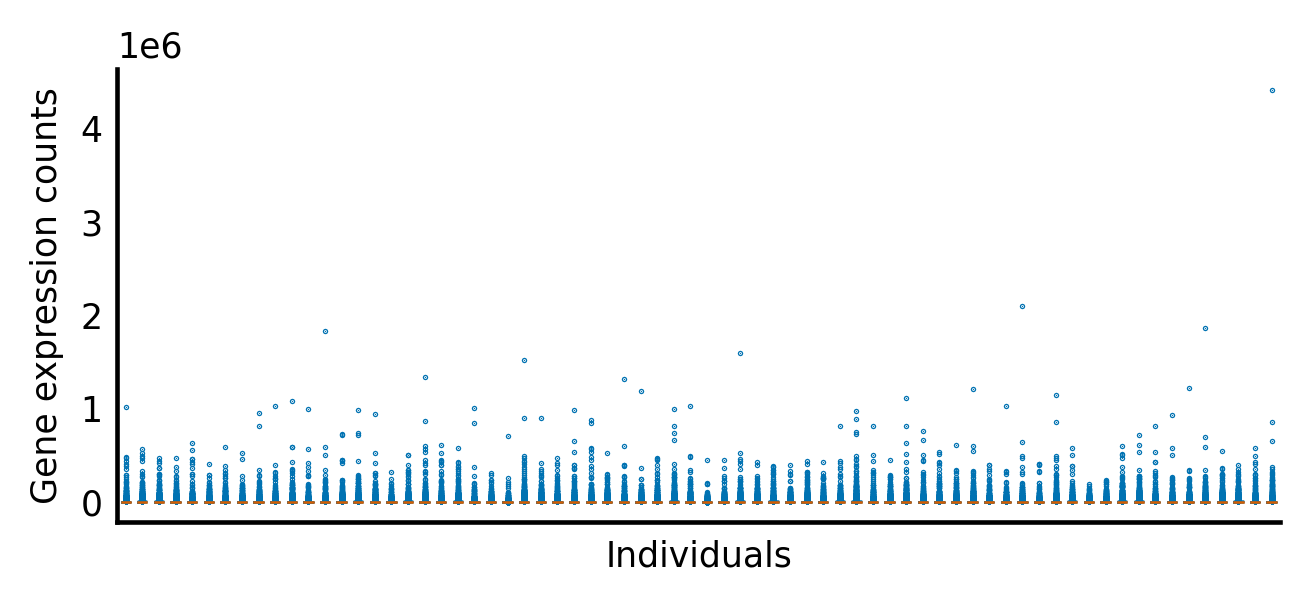

In [28]:
# Box plot of expression counts by individual
fig, ax = plt.subplots(figsize=(5, 2))

with plt.style.context('style/thinner.mplstyle'):
    ax.boxplot(counts_subset)
    ax.set_xlabel("Individuals")
    ax.set_ylabel("Gene expression counts")
    reduce_xaxis_labels(ax, 10)

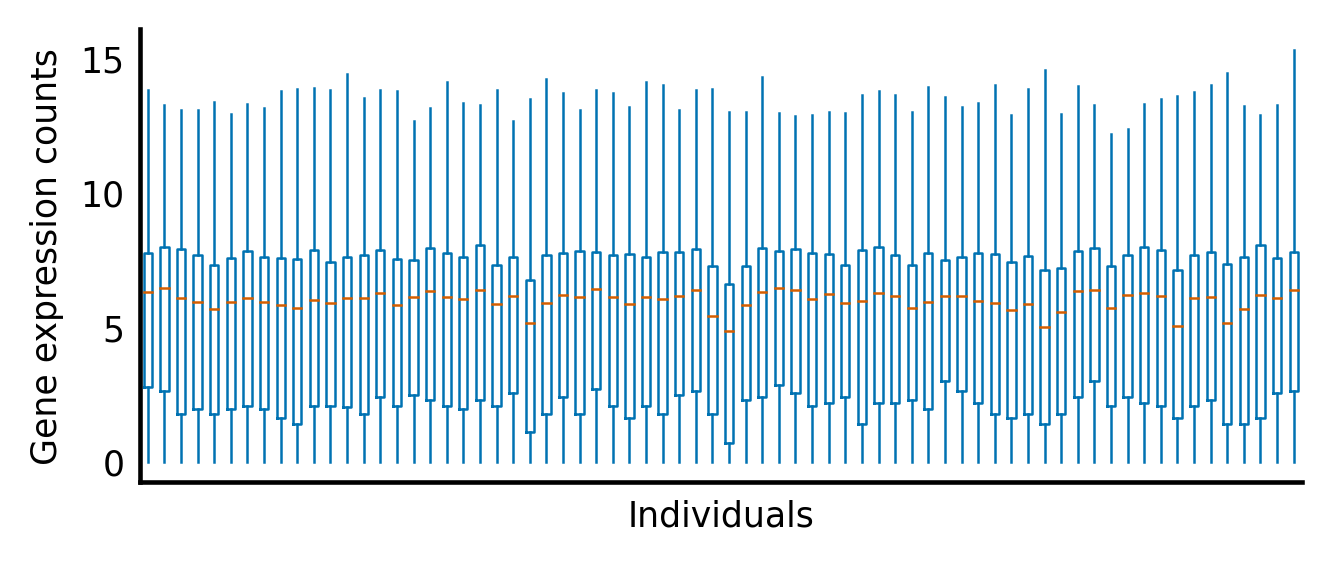

In [29]:
# Box plot of expression counts by individual
fig, ax = plt.subplots(figsize=(5, 2))

with plt.style.context('style/thinner.mplstyle'):
    ax.boxplot(np.log(counts_subset + 1))
    ax.set_xlabel("Individuals")
    ax.set_ylabel("Gene expression counts")
    reduce_xaxis_labels(ax, 10)

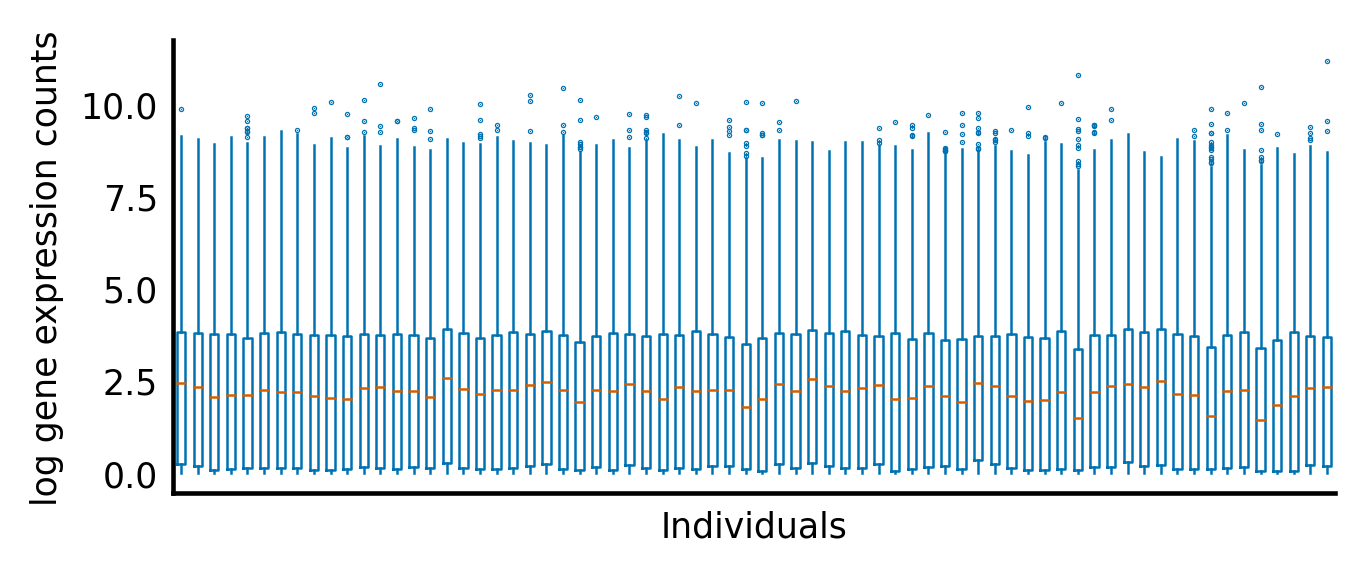

In [32]:
# Normalize by library size
# Divide the expression counts by the total counts for that individual
# Multiply by 1 million to get things back in a similar scale
counts_lib_norm = counts / total_counts * 1000000
# Notice how we just used broadcasting twice there!
counts_subset_lib_norm = counts_lib_norm[:,samples_index]

fig, ax = plt.subplots(figsize=(5, 2))

with plt.style.context('style/thinner.mplstyle'):
    ax.boxplot(np.log(counts_subset_lib_norm + 1))
    ax.set_xlabel("Individuals")
    ax.set_ylabel("log gene expression counts")
    reduce_xaxis_labels(ax, 10)